# corrosion module example

This example demonstrates the following steps:

+ raw parameter data
+ initialize model: corrosion model, section loss model
+ run model
+ Corrosion current density and corrosion rate
+ Accumulated section loss over time
+ post-process model results

In [1]:
%matplotlib inline

# Import necessary modules for corrosion modeling and plotting
from rational_rc.corrosion import CorrosionModel, SectionLossModel

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define raw parameters for the corrosion model
class Param: 
    pass

raw_pars = Param()

# Geometry and age
raw_pars.d = 0.04  # Concrete cover depth [m]
raw_pars.t = 3650  # Age of the structure [days]

# Concrete composition
raw_pars.cement_type = 'Type I'     # Type of cement
raw_pars.concrete_density = 2400    # Concrete density [kg/m^3]
raw_pars.a_c = 2                    # Aggregate (fine and coarse)/cement ratio [-]
raw_pars.w_c = 0.5                  # Water/cement ratio [-]
raw_pars.rho_c = 3100               # Density of cement particles [kg/m^3]
raw_pars.rho_a = 2600               # Density of aggregate particles [kg/m^3] (range: 2400-2900)

# Concrete condition
raw_pars.epsilon = 0.25     # Porosity of concrete [-]
raw_pars.theta_water = 0.1  # Volumetric water content [-]
raw_pars.T = 273.15 + 25    # Temperature [K]

In [3]:
# Initialize and run the corrosion model with the defined parameters
model_corr = CorrosionModel(raw_pars)
model_corr.run()

# Access results: Corrosion current density (icorr)
print(f"icorr [A/m^2]: {model_corr.icorr.mean()}")  # Mean corrosion current density [A/m^2]

# Access results: Section loss rate (corrosion rate)
print(f"section loss rate [mm/year]: {model_corr.x_loss_rate.mean()}")  # Mean section loss rate [mm/year]

icorr [A/m^2]: 0.005175726456318143
section loss rate [mm/year]: 0.005994119803982768


* Accumulated Section Loss with Increasing Probability of Active Corrosion

In this section, we will calculate the accumulated section loss over time, factoring in the increasing probability of active corrosion.

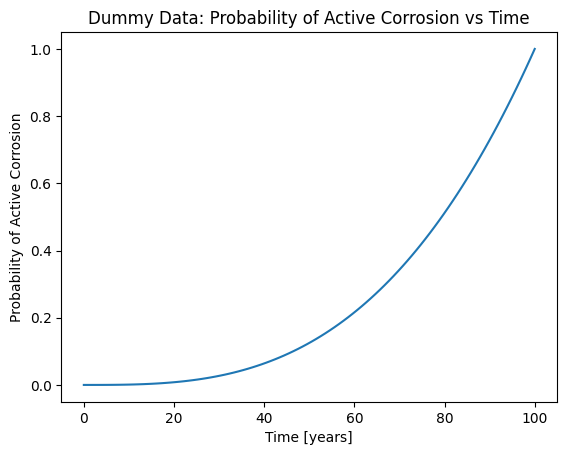

In [4]:
# Time steps
t_lis = np.linspace(0, 100 , 100)  

# Probability of active corrosion with time. This is determined by results from membrane, carbonation, or chloride module.
# For this example, we use a cubic relationship to demonstrate.
pf_lis = np.linspace(0,1,len(t_lis))**3

# Plot the dummy data for the probability of active corrosion over time
plt.plot(t_lis, pf_lis)
plt.title('Dummy Data: Probability of Active Corrosion vs Time')
plt.xlabel('Time [years]')
plt.ylabel('Probability of Active Corrosion')
plt.show()


Pf(g = R-S < 0) from various methods
    sample count: 2e-05
    g integral: 2.4532554359191037e-05
    R S integral: 3.094014794230173e-05
    beta_factor: 4.128033340442488
0.3948803520340609 0.0018759329207544849


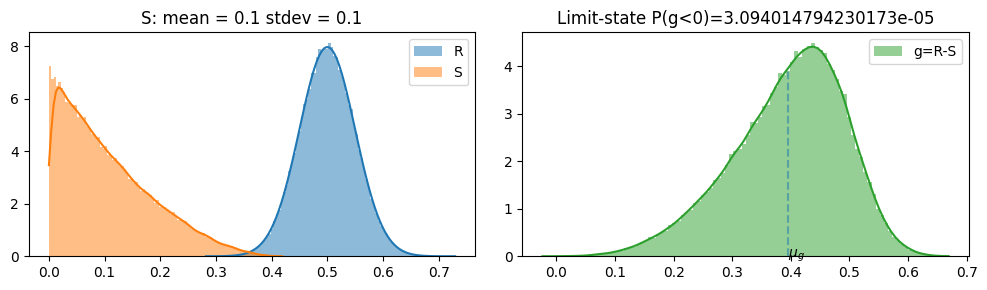

In [5]:
# Prepare the parameters for the section loss model
pars_sl = Param()

# Assign the mean section loss rate (from the corrosion model) [mm/year]
pars_sl.x_loss_rate = model_corr.x_loss_rate.mean()

# Use dummy data for the probability of active corrosion over time (t_lis, pf_lis)
pars_sl.p_active_t_curve = (t_lis, pf_lis)

# Critical section loss from external structural analysis
pars_sl.x_loss_limit_mean = 0.5  # Mean critical section loss limit [mm]
pars_sl.x_loss_limit_std = 0.5 * 0.1  # Standard deviation of the section loss limit [mm]

# Initialize the section loss model object with the defined parameters
model_sl = SectionLossModel(pars_sl)

# Run the section loss model for 70 years
model_sl.run(t_end=70)

# Post-process and plot the results
model_sl.postproc(plot=True)


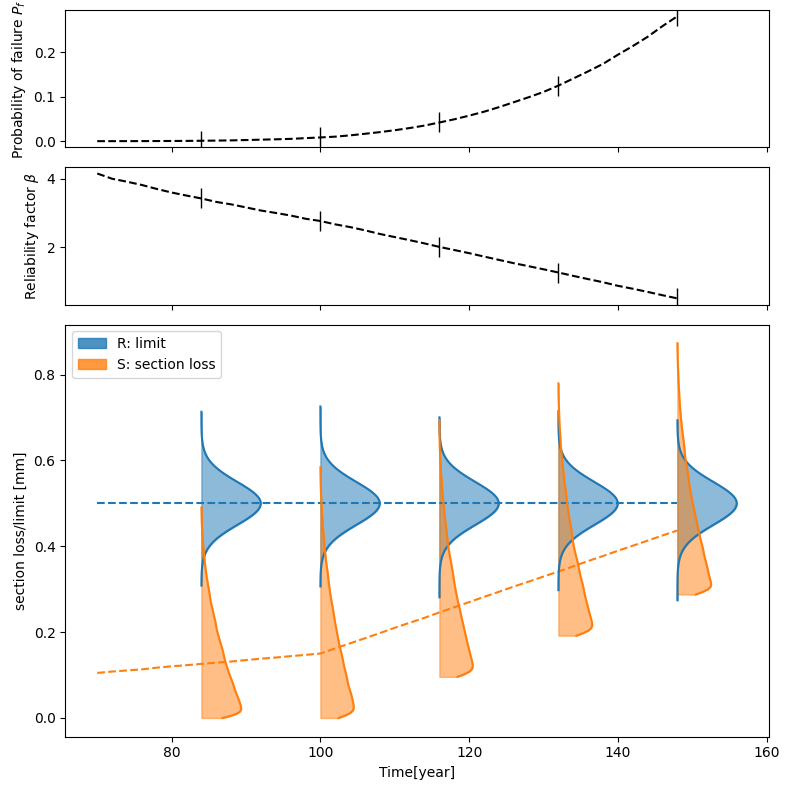

In [6]:
# Run the section loss model through a list of year steps
# Define the list of years from 70 to 150, with a step of 2 years
year_lis = np.arange(70, 150, 2)

# Compute the probability of failure (P_f) and reliability index (β) over the time steps
pf_sl, beta_sl = model_sl.section_loss_with_year(
    year_lis=year_lis,  # List of years
    amplify=1           # Amplification factor for better visualization
)
